# fbprophet on Berkeley-Data

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from fbprophet import Prophet

Importing plotly failed. Interactive plots will not work.


In [126]:
DATA = '/Users/maxkoeppel/SPICED/Week_05/interactive_climate_map/data/all_country_temp_data_CLEAN.csv'
data = pd.read_csv(DATA)
list(data.columns)

['country', 'year', 'month', 'monthly_anomaly', 'monthly_uncertainty']

In [29]:
data['country'].unique()

array(['Afghanistan', 'Åland', 'Albania', 'Algeria', 'American Samoa',
       'Andorra', 'Angola', 'Anguilla', 'Antarctica',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba',
       'Australia', 'Austria', 'Azerbaijan', 'The Bahamas', 'Bahrain',
       'Baker Island', 'Bangladesh', 'Barbados', 'Belarus', 'Belgium',
       'Belize', 'Benin', 'Bhutan', 'Bolivia',
       'Bonaire, Saint Eustatius and Saba', 'Bosnia and Herzegovina',
       'Botswana', 'Brazil', 'British Virgin Islands', 'Bulgaria',
       'Burkina Faso', 'Myanmar', 'Burundi', 'Cambodia', 'Cameroon',
       'Canada', 'Cape Verde', 'Cayman Islands',
       'Central African Republic', 'Chad', 'Chile', 'China',
       'Christmas Island', 'Colombia', 'Comoros', 'Republic of the Congo',
       'Democratic Republic of the Congo', 'Costa Rica', 'Ivory Coast',
       'Croatia', 'Cuba', 'Curaçao', 'Cyprus', 'Czechia', 'Denmark',
       'Denmark (Europe)', 'Djibouti', 'Dominica', 'Dominican Republic',
       'Ecuador', 

In [127]:
data['year_month'] = data.year.astype(str) + "-" + data.month.astype(str)
data['date'] = pd.to_datetime(data['year_month'].astype(str), yearfirst = True)
data.head()

,country,year,month,monthly_anomaly,monthly_uncertainty,year_month,date
0,Afghanistan,1900,1,-4.048,0.936,1900-1,1900-01-01
1,Afghanistan,1900,2,-2.086,1.135,1900-2,1900-02-01
2,Afghanistan,1900,3,1.835,0.933,1900-3,1900-03-01
3,Afghanistan,1900,4,-1.268,0.536,1900-4,1900-04-01
4,Afghanistan,1900,5,0.360,0.524,1900-5,1900-05-01


In [128]:
data.isna().sum()

country                   0
year                      0
month                     0
monthly_anomaly        1045
monthly_uncertainty     306
year_month                0
date                      0
dtype: int64

In [131]:
data = data.loc[data['country'] != 'Antarctica']

,country,year,month,monthly_anomaly,monthly_uncertainty,year_month,date
10920,Antarctica,1950,2,NaN,2.107,1950-2,1950-02-01
10921,Antarctica,1950,3,NaN,2.168,1950-3,1950-03-01
10922,Antarctica,1950,4,NaN,2.197,1950-4,1950-04-01
10923,Antarctica,1950,5,NaN,2.249,1950-5,1950-05-01
10924,Antarctica,1950,6,NaN,2.504,1950-6,1950-06-01
...,...,...,...,...,...,...,...
11679,Antarctica,2013,5,NaN,0.574,2013-5,2013-05-01
11680,Antarctica,2013,6,NaN,0.612,2013-6,2013-06-01
11681,Antarctica,2013,7,NaN,0.673,2013-7,2013-07-01
11682,Antarctica,2013,8,NaN,0.818,2013-8,2013-08-01


In [ ]:
data.dropna(inplace = True)

In [132]:
country_list = data['country'].unique()

In [100]:
def select_and_process_country(country):
    '''
    processes the given countries according to the input needs of fbprophet
    
    Params:
        input: a list of countries as array (and the corresponding temperature dataframe from Berkeley)
        output: a dataframe that can be forwarded to fbprophet
    '''
    df = data.loc[data['country'] == country]
    df = df[['date', 'monthly_anomaly']]
    df = df.rename(columns={'date':'ds', 'monthly_anomaly':'y'})
    return df

In [101]:
def forecast_prophet(df):
    '''
    provides fbprophet temperature forecasts for periods (20 years) for the given country-df
    
    Params:
        input: a formatted dataframe with the date 'ds' and temperature-values as 'y'
        output: a forecast dataframe with the results (ds as date and trend as temp.-prediction)
    '''
    m = Prophet()
    m.fit(df)
    future = m.make_future_dataframe(periods=240, freq='MS', include_history=False)
    forecast = m.predict(future)
    return forecast

In [102]:
collected_forecast = []
for country in country_list: 
    df = select_and_process_country(country)
    forecast = forecast_prophet(df)
    result = forecast[['ds', 'trend']]
    result['country'] = country
    collected_forecast.append(result)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disablin

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seaso

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seaso

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seaso

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seaso

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seaso

In [103]:
final_results = pd.concat(collected_forecast)

In [104]:
final_results.shape

(56640, 3)

In [109]:
final_results.to_csv('country_forecast.csv', sep=',', header=True,index=False)

In [113]:
Germ = select_and_process_country('Germany')

In [114]:
forecastGerm

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2013-10-01,1.011803,-1.383074,2.972360,1.011803,1.011803,-0.246377,-0.246377,-0.246377,-0.246377,-0.246377,-0.246377,0.0,0.0,0.0,0.765426
1,2013-11-01,1.013489,-1.439997,2.918449,1.013489,1.013489,-0.247256,-0.247256,-0.247256,-0.247256,-0.247256,-0.247256,0.0,0.0,0.0,0.766232
2,2013-12-01,1.015120,-1.314171,3.160986,1.015120,1.015120,-0.170103,-0.170103,-0.170103,-0.170103,-0.170103,-0.170103,0.0,0.0,0.0,0.845017
3,2014-01-01,1.016806,-0.940097,3.194812,1.016806,1.016806,0.097563,0.097563,0.097563,0.097563,0.097563,0.097563,0.0,0.0,0.0,1.114369
4,2014-02-01,1.018492,-1.088892,3.196960,1.018492,1.018492,0.044867,0.044867,0.044867,0.044867,0.044867,0.044867,0.0,0.0,0.0,1.063359
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235,2033-05-01,1.400747,-0.498666,3.834080,1.379892,1.421133,0.294752,0.294752,0.294752,0.294752,0.294752,0.294752,0.0,0.0,0.0,1.695499
236,2033-06-01,1.402433,-1.056071,3.453774,1.381451,1.422858,-0.211575,-0.211575,-0.211575,-0.211575,-0.211575,-0.211575,0.0,0.0,0.0,1.190858
237,2033-07-01,1.404064,-0.589645,3.716539,1.382960,1.424644,0.229480,0.229480,0.229480,0.229480,0.229480,0.229480,0.0,0.0,0.0,1.633544
238,2033-08-01,1.405750,-0.458231,3.777713,1.384520,1.426507,0.108419,0.108419,0.108419,0.108419,0.108419,0.108419,0.0,0.0,0.0,1.514169


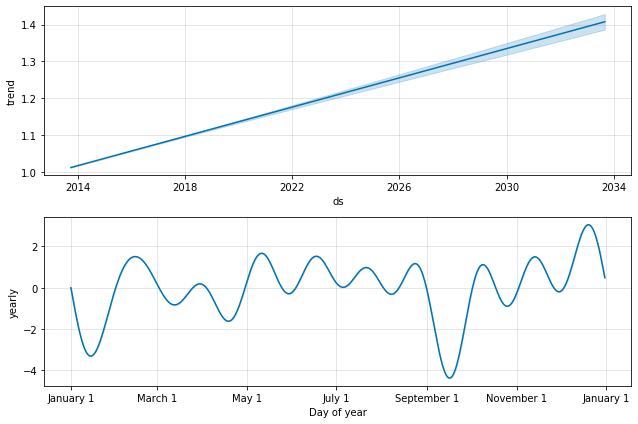

In [134]:
fig2 = m.plot_components(forecastGerm)

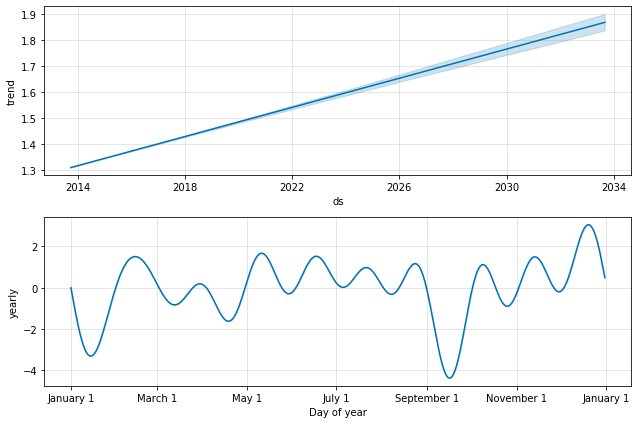

In [135]:
fig2 = m.plot_components(forecastAfg)